**MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE**.

**Course: TC5035.10 - Integration project**

Tecnológico de Monterrey

Professor Dr. Horacio Martínez Alfaro

**Week 2, Activity 1**

Exploratory data analysis

---

*   Student: Jorge Antonio Acosta Rosales
*   Registration: A01381552
*   Student: Israel Luján González
*   Registration: A01794693

# **Part 1**. EDA and preprocessing

### 1. Obtain descriptive statistics for all the variables in the dataframe. 

In [37]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import missingno as msno  # for missing-data visualization

In [38]:
# Load variables from .env file for local development or get it from the environment variables in production
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    pass  # Safe fallback if it's not available in prod

base_path = os.getenv("LSM_BASE")
if not base_path:
    raise ValueError("❌ Environment variable 'LSM_BASE' is not set!")

model_path = os.path.join(base_path, "models", "hand_landmarker.task")
gestures_json_path = os.path.join(base_path, "data", "metadata", "gestures.json")

In [39]:
# Load JSON files
gestures_df = pd.read_json(gestures_json_path)


print("Summary of the datatypes and the values in the gestures dataset:")
display(gestures_df.head())
print("-" * 50)
gestures_df.info()
print("-" * 50)
gestures_df.dtypes

Summary of the datatypes and the values in the gestures dataset:


,image,video,letter,gesture_type,timestamp,image_size,hand_count,handedness_detected,hand_confidence,landmarks,fps,total_frames
0,A_5e324a1c.jpg,None,A,static,2025-05-05 04:41:24.906949+00:00,"[640, 480]",1,[right],"{'right_hand': 0.9928518533706661, 'left_hand'...","[{'frame': 0, 'landmarks': [{'x': 0.6433773636...",NaN,NaN
1,A_68b44884.jpg,None,A,static,2025-05-05 04:41:24.949117+00:00,"[640, 480]",1,[right],"{'right_hand': 0.9928518533706661, 'left_hand'...","[{'frame': 0, 'landmarks': [{'x': 0.6433773636...",NaN,NaN
2,A_dce2c7b6.jpg,None,A,static,2025-05-05 04:41:24.990533+00:00,"[640, 480]",1,[right],"{'right_hand': 0.9904012680053711, 'left_hand'...","[{'frame': 0, 'landmarks': [{'x': 0.2537608444...",NaN,NaN
3,A_755c5ece.jpg,None,A,static,2025-05-05 04:41:25.030139+00:00,"[640, 480]",1,[left],"{'right_hand': None, 'left_hand': 0.9957619309...","[{'frame': 0, 'landmarks': [{'x': 0.7184741497...",NaN,NaN
4,A_425c5e08.jpg,None,A,static,2025-05-05 04:41:25.071710+00:00,"[640, 480]",1,[left],"{'right_hand': None, 'left_hand': 0.9957516789...","[{'frame': 0, 'landmarks': [{'x': 0.4399253129...",NaN,NaN


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   image                1715 non-null   object             
 1   video                9 non-null      object             
 2   letter               1724 non-null   object             
 3   gesture_type         1724 non-null   object             
 4   timestamp            1724 non-null   datetime64[ns, UTC]
 5   image_size           1724 non-null   object             
 6   hand_count           1724 non-null   int64              
 7   handedness_detected  1715 non-null   object             
 8   hand_confidence      1715 non-null   object             
 9   landmarks            1724 non-null   object             
 10  fps                  9 non-null      float64            
 11  total_frames         9 non-null

image                               object
video                               object
letter                              object
gesture_type                        object
timestamp              datetime64[ns, UTC]
image_size                          object
hand_count                           int64
handedness_detected                 object
hand_confidence                     object
landmarks                           object
fps                                float64
total_frames                       float64
dtype: object

In [40]:
numerical_columns = gestures_df.select_dtypes(include = ['int', 'float']).columns
temporal_columns = gestures_df.select_dtypes(include = ['datetime64[ns, UTC]']).columns
categorical_columns = gestures_df.select_dtypes(include = ['object','category']).columns

print("Numerical columns: ", numerical_columns.to_list())
print("Temporal columns: ", temporal_columns.to_list())
print("Categorical columns: ", categorical_columns.to_list())
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of temporal columns: {len(temporal_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")  

Numerical columns:  ['hand_count', 'fps', 'total_frames']
Temporal columns:  ['timestamp']
Categorical columns:  ['image', 'video', 'letter', 'gesture_type', 'image_size', 'handedness_detected', 'hand_confidence', 'landmarks']
Number of numerical columns: 3
Number of temporal columns: 1
Number of categorical columns: 8


In [42]:
# Show the statistics of the numerical columns
gestures_df[numerical_columns].describe()

,hand_count,fps,total_frames
count,1724.000000,9.0,9.0
mean,1.243619,20.0,100.0
std,3.426170,0.0,0.0
min,1.000000,20.0,100.0
25%,1.000000,20.0,100.0
50%,1.000000,20.0,100.0
75%,1.000000,20.0,100.0
max,80.000000,20.0,100.0


In [43]:
# Show the statistics of the categorical columns
gestures_df[categorical_columns].describe()

,image,video,letter,gesture_type,image_size,handedness_detected,hand_confidence,landmarks
count,1715,9,1724,1724,1724,1715,1715,1724
unique,1715,9,29,2,1,6,1603,1613
top,A_5e324a1c.jpg,J_dyn_9fb5f8ab.mp4,S,static,"[640, 480]",[left],"{'right_hand': 0.9928518533706661, 'left_hand'...","[{'frame': 0, 'landmarks': [{'x': 0.6433773636..."
freq,1,1,223,1448,1724,949,2,2


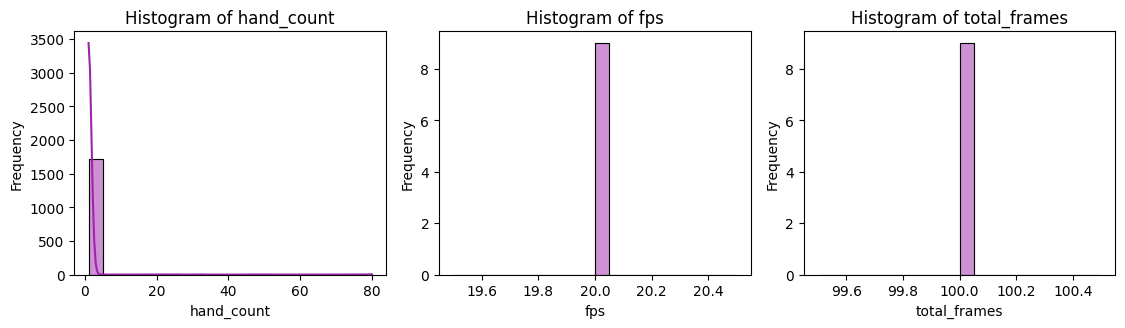

In [44]:
# Plot histograms with KDE for all numerical columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(gestures_df[col], kde=True, bins=20, color='#9d25aa')   # you can choose the color you want using hex code
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()